In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from linearmodels import PanelOLS
import plotly.express as px

sns.set_theme()

In [18]:
path = 'Datasets/' # To be changed if needed

Source: https://www.idea.int/data-tools/data/gender-quotas-database/database

In [19]:
df = pd.read_csv(path + 'parliaments.csv',sep=';')

In [20]:
columns_to_convert = ['Single/Lower House>Total seats', 'Single/Lower House>Seats held by women', 
                      'Upper house>Total seats', 'Upper house>Seats held by women']

for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [21]:
df[df['Single/Lower House>Total seats'] == 0]

,Country,ISO2,ISO3,Single/Lower House>Quota type,Single/Lower House>Total seats,Single/Lower House>Seats held by women,Upper house>Quota type,Upper house>Total seats,Upper house>Seats held by women
0,Afghanistan,AF,AFG,-,0,0.0,No legislated,68.0,19.0


In [22]:
df['Quota_L'] = df['Single/Lower House>Seats held by women']/df['Single/Lower House>Total seats']
df['Quota_U'] = df['Upper house>Seats held by women']/df['Upper house>Total seats']
df['Quota_avg'] = df[['Quota_L', 'Quota_U']].mean(axis=1)
df['Quota_avg_percent'] = df['Quota_avg'] * 100
df['Quota_L_percent'] = df['Quota_L'] * 100

<Figure size 1200x600 with 0 Axes>

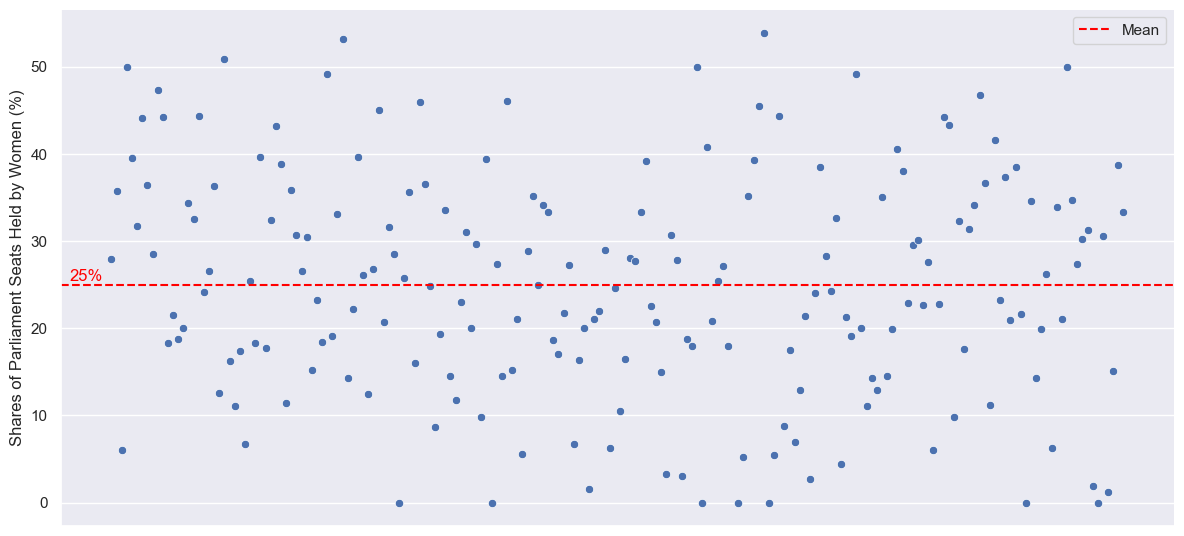

In [ ]:
sns.relplot(x='ISO2', y='Quota_avg_percent', data=df,height=6, aspect=2)
mean = df['Quota_avg_percent'].mean()
plt.axhline(mean, color='red', linestyle='--', label='Mean')

plt.text(
    x=-5, y=mean+0.5,  # Posizione del testo (x è un valore arbitrario)
    s=f"{mean:.0f}%",  # Testo da mostrare
    color='red', fontsize=12, ha='center'
)
plt.ylabel("Shares of Parliament Seats Held by Women (%)")
plt.xlabel('')
plt.xticks([])
plt.legend()
plt.show()

In [24]:
fig = px.choropleth(
    df,
    locations="ISO3",           # Colonna dei nomi dei paesi
    locationmode="ISO-3",   # Usa i nomi dei paesi
    color="Quota_avg_percent",                  # Colonna con i valori numerici
    color_continuous_scale="Blues", # Scegli una scala di colori
)
fig.update_geos(
    showframe=False,
    showcoastlines=True,
    showland=True,
    showocean=True,
    landcolor='darkgray',
    oceancolor="#E0FFFF", 
    projection_type="natural earth"
)

fig.update_layout(
    margin={"r":0,"t":10,"l":10,"b":10},
    coloraxis_colorbar=dict(
        title="(%)",
        ticks="outside",
        ticklen=5,
        tickcolor='darkgray'
    ),
    font=dict(
        family="Helvetica",
        size=14,
        color="black"
    ),
    width=1200,
    height=600,
)
fig.update_traces(
    marker_line_width=0.5, 
    marker_line_color="black",
    autocolorscale=False,
    colorbar_title="(%)"
)

fig.show()

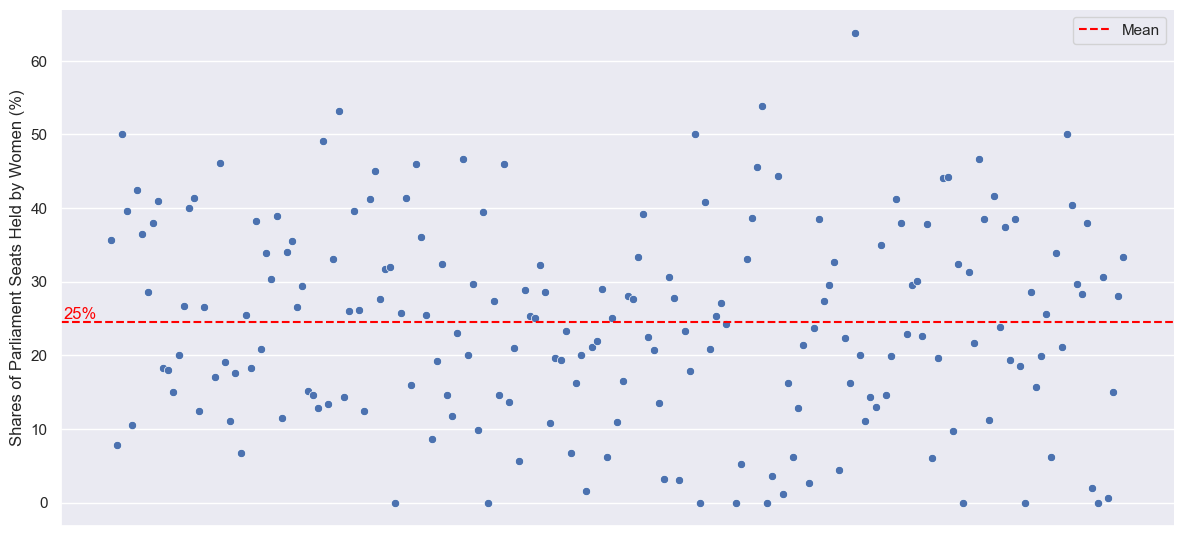

In [25]:
sns.relplot(x='ISO2', y='Quota_L_percent', data=df,height=6, aspect=2)
mean = df['Quota_L_percent'].mean()
plt.axhline(mean, color='red', linestyle='--', label='Mean')

plt.text(
    x=-5, y=mean+0.5,  # Posizione del testo (x è un valore arbitrario)
    s=f"{mean:.0f}%",  # Testo da mostrare
    color='red', fontsize=12, ha='center'
)
plt.ylabel("Shares of Parliament Seats Held by Women (%)")
plt.xlabel('')
plt.xticks([])
plt.legend()
plt.show()

In [26]:
fig = px.choropleth(
    df,
    locations="ISO3",           # Colonna dei nomi dei paesi
    locationmode="ISO-3",   # Usa i nomi dei paesi
    color="Quota_L_percent",                  # Colonna con i valori numerici
    color_continuous_scale="Blues", # Scegli una scala di colori
)
fig.update_geos(
    showframe=False,
    showcoastlines=True,
    showland=True,
    showocean=True,
    landcolor='darkgray',
    oceancolor="#E0FFFF", 
    projection_type="natural earth"
)

fig.update_layout(
    margin={"r":0,"t":10,"l":10,"b":10},
    coloraxis_colorbar=dict(
        title="(%)",
        ticks="outside",
        ticklen=5,
        tickcolor='darkgray'
    ),
    font=dict(
        family="Helvetica",
        size=14,
        color="black"
    ),
    width=1200,
    height=600,
)
fig.update_traces(
    marker_line_width=0.5, 
    marker_line_color="black",
    autocolorscale=False,
    colorbar_title="(%)"
)

fig.show()